<a href="https://colab.research.google.com/github/VitalyGladyshev/Python_for_DS/blob/master/Lab1_part2_ml_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Гладышев ВВ

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2025-03-16 09:06:32--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2025-03-16 09:06:32 (3.95 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,675,100,58,109,230,70,11,226,30,25,182,234,752,207,72,0,13,187,198
1,509,101,55,105,182,59,10,215,31,24,177,221,678,223,74,12,26,186,195
2,68,86,44,78,164,68,9,142,46,18,147,168,305,171,70,1,11,190,201
3,207,85,42,64,121,55,7,149,46,19,146,167,323,172,85,1,6,179,182
4,579,84,38,66,138,62,6,126,54,18,132,144,232,139,70,4,7,185,190
5,585,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
6,471,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202
7,364,87,45,77,153,59,7,154,44,19,145,181,350,172,75,15,14,184,189
8,150,104,50,96,211,65,10,187,35,22,156,207,527,195,65,3,7,195,206
9,845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,413.850638,93.692168,44.852459,81.969035,169.112933,61.754098,8.377049,168.653916,40.994536,20.559199,147.766849,188.562842,439.471767,174.963570,72.435337,6.464481,12.588342,188.961749,195.548270
std,241.695025,8.399576,6.159535,15.869131,34.115117,7.975076,4.071207,33.459482,7.944031,2.594677,14.528989,31.670322,177.154613,32.695154,7.242030,5.056714,8.923127,6.058444,7.398457
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,202.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.000000,185.000000,190.000000
50%,414.000000,93.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,613.000000,100.000000,50.000000,98.000000,195.000000,66.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,597.000000,198.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,188.000000,320.000000,998.000000,264.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [5]:
### YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

enc = LabelEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [6]:
y_test[:10]

array([3, 3, 3, 1, 3, 3, 1, 1, 1, 1])

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3]), array([147, 126, 153, 123]))

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

!pip install scikit-plot

In [ ]:
# !pip install --upgrade scipy scikit-learn scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [10]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 48.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot as skplt
import matplotlib.pyplot as plt

Оптимальные гиперпараметры: {'C': 10, 'penalty': 'l1'}
Accuracy на тесте: 0.8350
Macro F1-Score на тесте: 0.8322


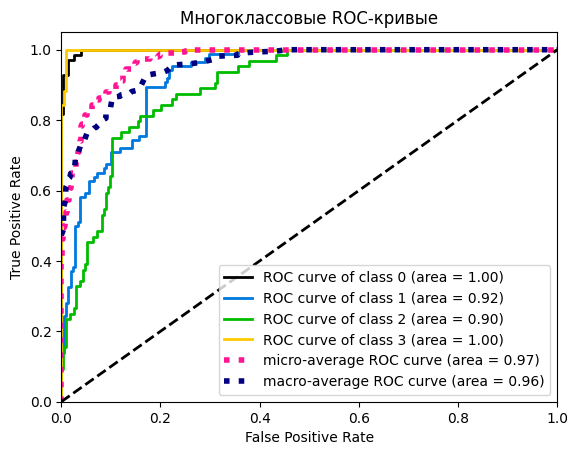

In [8]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
import scikitplot as skplt
import matplotlib.pyplot as plt
# from scipy.interpolate import interp

model = LogisticRegression(solver='saga', # multi_class='multinomial',
                           tol=1e-3, max_iter=500, random_state=42)

# Определим параметры и их диапазоны значений
param_grid = {
    'C': [0.1, 1, 10],          # Обратная величина силы регуляризации
    'penalty': ['l1', 'l2']     # Тип регуляризации
}

# GridSearchCV с кросс-влидацией на 5 фолдах
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

# Получим модель с лучшими параметрами
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Оптимальные гиперпараметры: {grid_search.best_params_}")
print(f"Accuracy на тесте: {accuracy:.4f}")
print(f"Macro F1-Score на тесте: {f1:.4f}")

y_proba = best_model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)
plt.title('Многоклассовые ROC-кривые')
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

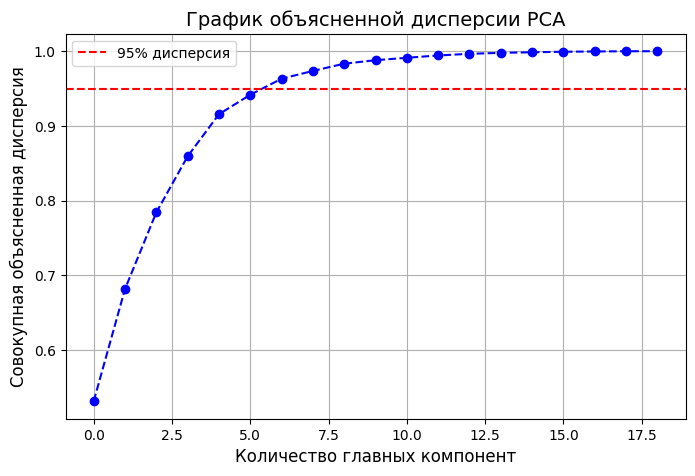

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

# Найдём совокупную объясненную дисперсию
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Количество главных компонент', fontsize=12)
plt.ylabel('Совокупная объясненная дисперсия', fontsize=12)
plt.title('График объясненной дисперсии PCA', fontsize=14)
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсия')
plt.legend()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [13]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"{pca.n_components_} компонент объясняют {np.sum(pca.explained_variance_ratio_):.2%} дисперсии")

7 компонент объясняют 96.32% дисперсии


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Лучшие параметры: {'C': 10, 'penalty': 'l2'}
Accuracy на тесте: 0.5421
Macro F1-Score на тесте: 0.5189


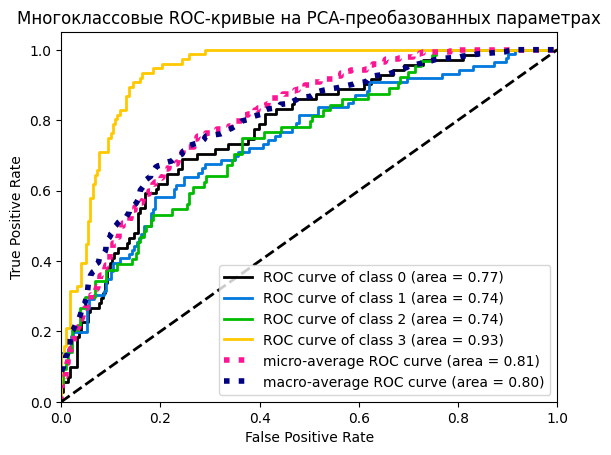

In [14]:
### YOUR CODE HERE
logreg = LogisticRegression(solver='saga',
                            tol=1e-3,
                            max_iter=1000,  # Added for convergence assurance
                            random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=logreg,
                          param_grid=param_grid,
                          cv=5,
                          scoring='f1_macro',
                          n_jobs=-1)

# Обучаем на PCA-преобазованных параметрах
grid_search.fit(X_train_pca, y_train)

# Лучшая модель
best_logreg = grid_search.best_estimator_

y_pred = best_logreg.predict(X_test_pca)
y_proba = best_logreg.predict_proba(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Accuracy на тесте: {accuracy:.4f}")
print(f"Macro F1-Score на тесте: {f1:.4f}")

skplt.metrics.plot_roc(y_test, y_proba)
plt.title('Многоклассовые ROC-кривые на PCA-преобазованных параметрах')
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': list(range(1, 21))
}

grid_search = GridSearchCV(estimator=tree,
                          param_grid=param_grid,
                          cv=5,
                          scoring='f1_macro',
                          n_jobs=-1)

grid_search.fit(X_train_pca, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Оптимальная Tree Depth: {grid_search.best_params_['max_depth']}")
print(f"Accuracy на тесте: {accuracy:.4f}")
print(f"Macro F1-Score на тесте: {f1:.4f}")

Оптимальная Tree Depth: 7
Accuracy на тесте: 0.5522
Macro F1-Score на тесте: 0.5475


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [16]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
forest = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [25, 50, 100, 200, 500]
}

grid_search = GridSearchCV(estimator=forest,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro',
                           n_jobs=-1)

grid_search.fit(X_train_pca, y_train)

best_tree = grid_search.best_estimator_

y_pred = best_tree.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Оптимальное количесво деревьев: {grid_search.best_params_['n_estimators']}")
print(f"Accuracy на тесте: {accuracy:.4f}")
print(f"Macro F1-Score на тесте: {f1:.4f}")

Оптимальное количесво деревьев: 500
Accuracy на тесте: 0.6532
Macro F1-Score на тесте: 0.6473


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Наилучшие значения метрик получены на модели - логистической регресии с гиперпараметрами:
- Обратная величина силы регуляризации C = 10
- Тип регуляризации L1

In [17]:
# YOUR CODE HERE

model = LogisticRegression(solver='saga', C=10, penalty='l1',
                           tol=1e-3, max_iter=500, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy на тесте: {accuracy:.4f}")
print(f"Macro F1-Score на тесте: {f1:.4f}")

Accuracy на тесте: 0.8350
Macro F1-Score на тесте: 0.8322


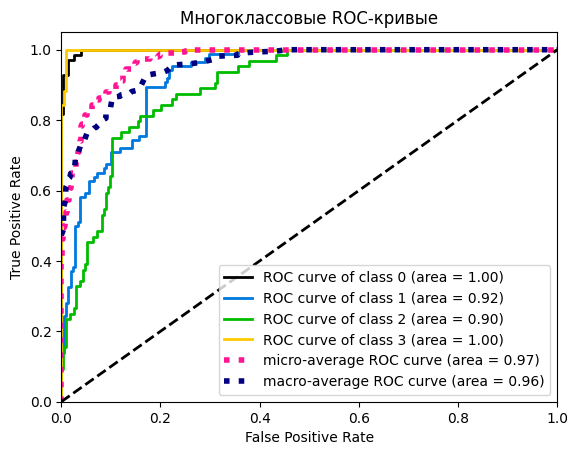

In [18]:
y_proba = model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, y_proba)
plt.title('Многоклассовые ROC-кривые')
plt.show()